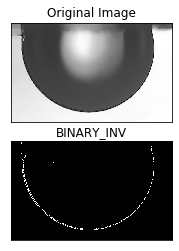

In [21]:
import math
from sympy import *
from cv2 import *
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from pandas import DataFrame
init_printing()
img = cv.imread('gotaa.jpg',0)
ret,thresh1 = cv.threshold(img,55,255,cv.THRESH_BINARY_INV)


titles = ['Original Image','BINARY_INV']
images = [img, thresh1]
#cv.imwrite("im.png", thresh1)

for i in range(2):
    plt.subplot(2,1,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [22]:
im = cv.imread('gotaa.jpg')
cv.imwrite("gotaabinary.jpg", thresh1)
im2, contours, hierarchy = cv.findContours(thresh1, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

#As linhas de código acima realizam o thresholding e o salvam na mesma pasta onde o código está. O arquivo recebe o nome de
#gotaa.jpg

In [4]:
cv.imshow('Contours', im2)
cv.waitKey(0) 
cv.destroyAllWindows()

#Esta célular serve apenas para mostrar o thresholding realizado na célula anterior. Apenas para visualização.

In [23]:
cont = cv.drawContours(im2, contours, -1, (70,0,0), 3) #70

cv.imwrite('Cont.jpg', cont)

cv.imshow('Contours', cont) 
cv.waitKey(0) 
cv.destroyAllWindows()

#Os comandos dessa célula identificam os pontos da borda da gotícula a partir da imagem criada anteriormente e a colorem
#com outra cor.

#Além disso, é exibido o resultado numa janela.

In [24]:
r = cv.selectROI(thresh1) #Seleciona a ROI

imCrop = thresh1[int(r[1]):int(r[1]+r[3]), int(r[0]):int(r[0]+r[2])] #Corta a imagem

cv.imwrite('r.jpg', imCrop)

cv.imshow("Image", imCrop) #Exibe a imagem cortada
cv.waitKey(0)

In [25]:
imager = cv.imread("r.jpg") #Armazena os dados da imagem na variável imager

indices = np.where(imager == [70])

coordinates = zip(indices[0], indices[1]) #Lista os pontos destacados anteriormente e organiza de acordo com sua posição no 
#plano xy da tela do computador.

In [26]:
datar = pd.DataFrame({'Y':indices[0],
                     'X':indices[1]})
datar

,Y,X
0,7,29
1,7,29
2,7,29
3,7,30
4,7,30
5,7,30
6,8,27
7,8,27
8,8,27
9,9,30


In [27]:
export_csv = datar.to_csv (r'C:\Users\iamca\Downloads\Iniciação Científica II\r.csv', index = None, header=True)

In [29]:
read = pd.read_csv('r.csv')
read

,Y,X
0,7,29
1,7,29
2,7,29
3,7,30
4,7,30
5,7,30
6,8,27
7,8,27
8,8,27
9,9,30


In [30]:
df_X = read['X']
df_X

0      29
1      29
2      29
3      30
4      30
5      30
6      27
7      27
8      27
9      30
10     30
11     30
12     23
13     23
14     23
15     23
16     23
17     23
18     26
19     26
20     26
21     19
22     19
23     19
24     21
25     21
26     21
27     25
28     25
29     25
       ..
258    31
259    31
260    31
261    32
262    32
263    32
264    33
265    33
266    33
267    35
268    35
269    35
270    28
271    28
272    28
273    30
274    30
275    30
276    31
277    31
278    31
279    32
280    32
281    32
282    33
283    33
284    33
285    35
286    35
287    35
Name: X, Length: 288, dtype: int64

In [31]:
df_Y = read['Y']
df_Y

0       7
1       7
2       7
3       7
4       7
5       7
6       8
7       8
8       8
9       9
10      9
11      9
12     27
13     27
14     27
15     28
16     28
17     28
18     30
19     30
20     30
21     32
22     32
23     32
24     33
25     33
26     33
27     33
28     33
29     33
       ..
258    72
259    72
260    72
261    72
262    72
263    72
264    72
265    72
266    72
267    72
268    72
269    72
270    73
271    73
272    73
273    73
274    73
275    73
276    73
277    73
278    73
279    73
280    73
281    73
282    73
283    73
284    73
285    73
286    73
287    73
Name: Y, Length: 288, dtype: int64

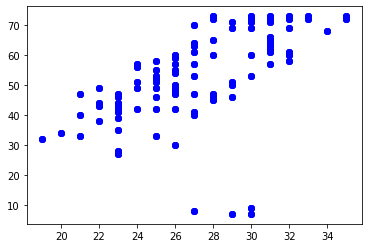

In [32]:
plt.figure(1) #Cria o plot
plt.subplot(111) #Dimensões do plot
plt.plot(df_X, df_Y, 'bo')

In [33]:
df_x = (df_X)
df_y = (df_Y)

Coeficientes estimados:
B = -11.50071344742863 
b = 2.3534646526904144


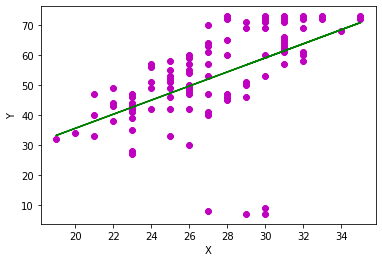

In [34]:
def coef_estimado(x, y):  
    n = np.size(x) 
  
    m_x, m_y = np.mean(x), np.mean(y) 
  
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
  
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
  
    return(b_0, b_1) 

def regressao_linear(x, y, b): 

    plt.scatter(x, y, color = "m", 
               marker = "o", s = 30) 
  
    y_pred = b[0] + b[1]*x 
  
    plt.plot(x, y_pred, color = "g") 
    
    plt.xlabel('X') 
    plt.ylabel('Y') 
  
    plt.show() 
  
def main():  
    x = df_x 
    y = df_y
  
    b = coef_estimado(x, y) 
    print("Coeficientes estimados:\nB = {} \nb = {}".format(b[0], b[1])) 
  
    regressao_linear(x, y, b) 
    
if __name__ == "__main__": 
    main()

In [36]:
y, x = symbols('y x') #define x e y como variáveis simbólicas.

def g(x): 
    return 2.3534646526904144*x + -11.50071344742863

g(x)

In [37]:
diff(g(x),x)

In [38]:
rad = np.arctan(2.3534)
rad

In [39]:
graus = (180*rad)/math.pi
graus

In [40]:
angulo_de_contato = 180 - graus
angulo_de_contato